# Image_Proccess_Gray

### Load scripts

In [1]:
%matplotlib inline
from script.util import *

In [2]:
t0 = time.time()

run_name = get_run_name('SC_Iceberg_Classifier', 'Image_Proccess_Gray')
html_folder = get_html_folder(True)
input_folder = get_input_folder(True)
input_processed_folder = get_input_processed_folder(True)
log_folder = get_log_folder(True)
model_folder = get_model_folder(True)
output_folder = get_output_folder(True)

run_name: SC_Iceberg_Classifier-Image_Proccess_Gray-20180112_221832
D:\Kaggle\statoil-iceberg-classifier-challenge\html
D:\Kaggle\statoil-iceberg-classifier-challenge\input
D:\Kaggle\statoil-iceberg-classifier-challenge\input\processed
D:\Kaggle\statoil-iceberg-classifier-challenge\log
D:\Kaggle\statoil-iceberg-classifier-challenge\model
D:\Kaggle\statoil-iceberg-classifier-challenge\output


In [3]:
%%time
id_data, id_test = load_id()
y_data = load_y_data()
band1_data, band2_data, band1_test, band2_test = load_band_data()
x_data, x_test = load_data()

(1604,) 000d71b1 fffe76e4 12928
(8424,) 000c65d7 fff77564 67488
(1604,) 0 1 12928
(1604, 75, 75) -45.594448 34.574917 72180128
(1604, 75, 75) -45.655499 20.154249 72180128
(8424, 75, 75) -45.6805458069 37.090523 379080128
(8424, 75, 75) -49.0835 37.0905227661 379080128
(1604, 75, 75, 3) -45.655499 34.574917 216540144
(8424, 75, 75, 3) -49.0835 37.090523 1137240144
Wall time: 10.4 s


In [4]:
def convert2gray(datas):
    datas_gray = np.zeros(datas.shape)
    for i, value in enumerate(datas):
        temp = datas[i,:,:]
        t_max = temp.max()
        t_min = temp.min()
        datas_gray[i,:,:] = (temp - t_min)/(t_max - t_min)
    return datas_gray

band1_data_gray = convert2gray(band1_data)
band2_data_gray = convert2gray(band2_data)
band1_test_gray = convert2gray(band1_test)
band2_test_gray = convert2gray(band2_test)

describe(band1_data_gray)
describe(band2_data_gray)
describe(band1_test_gray)
describe(band2_test_gray)

(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128


In [5]:
band1_data_gray_file = os.path.join(get_input_processed_folder(), 'band1_data_gray.npy')
band2_data_gray_file = os.path.join(get_input_processed_folder(), 'band2_data_gray.npy')
band1_test_gray_file = os.path.join(get_input_processed_folder(), 'band1_test_gray.npy')
band2_test_gray_file = os.path.join(get_input_processed_folder(), 'band2_test_gray.npy')

np.save(band1_data_gray_file, band1_data_gray)
np.save(band2_data_gray_file, band2_data_gray)
np.save(band1_test_gray_file, band1_test_gray)
np.save(band2_test_gray_file, band2_test_gray)

In [6]:
def load_band_data_gray(target_size=75, is_preview=True):
    if target_size == 75:
        target_size_str = ''
    else:
        target_size_str = str(target_size)
    band1_data_gray_file = os.path.join(get_input_processed_folder(), 'band1_data_gray%s.npy' % target_size_str)
    band2_data_gray_file = os.path.join(get_input_processed_folder(), 'band2_data_gray%s.npy' % target_size_str)
    band1_test_gray_file = os.path.join(get_input_processed_folder(), 'band1_test_gray%s.npy' % target_size_str)
    band2_test_gray_file = os.path.join(get_input_processed_folder(), 'band2_test_gray%s.npy' % target_size_str)

    band1_data_gray = np.load(band1_data_gray_file)
    band2_data_gray = np.load(band2_data_gray_file)
    band1_test_gray = np.load(band1_test_gray_file)
    band2_test_gray = np.load(band2_test_gray_file)
    if is_preview:
        describe(band1_data_gray)
        describe(band2_data_gray)
        describe(band1_test_gray)
        describe(band2_test_gray)
    return band1_data_gray, band2_data_gray, band1_test_gray, band2_test_gray

def load_data_gray(target_size=75, is_preview=True):
    if target_size == 75:
        target_size_str = ''
    else:
        target_size_str = str(target_size)
    
    band1_data_gray, band2_data_gray, band1_test_gray, band2_test_gray = load_band_data_gray(target_size=target_size, is_preview=False)
    band_max_data_gray = np.maximum(band1_data_gray, band2_data_gray)
    band_max_test_gray = np.maximum(band1_test_gray, band2_test_gray)

    x_data_gray = np.concatenate(
        [band1_data_gray[:, :, :, np.newaxis],
        band2_data_gray[:, :, :, np.newaxis],
        band_max_data_gray[:, :, :, np.newaxis]], axis=-1)

    x_test_gray = np.concatenate(
        [band1_test_gray[:, :, :, np.newaxis],
        band2_test_gray[:, :, :, np.newaxis],
        band_max_test_gray[:, :, :, np.newaxis]], axis=-1)

    if is_preview:
#         describe(band_max_data)
#         describe(band_max_test)

        describe(x_data_gray)
        describe(x_test_gray)
    
    return x_data_gray, x_test_gray

In [7]:
band1_data_gray, band2_data_gray, band1_test_gray, band2_test_gray = load_band_data_gray()
x_data_gray, x_test_gray = load_data_gray()
describe(band1_data_gray)
describe(band2_data_gray)
describe(band1_test_gray)
describe(band2_test_gray)

describe(x_data_gray)
describe(x_test_gray)

(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128
(1604, 75, 75, 3) 0.0 1.0 216540144
(8424, 75, 75, 3) 0.0 1.0 1137240144
(1604, 75, 75) 0.0 1.0 72180128
(1604, 75, 75) 0.0 1.0 72180128
(8424, 75, 75) 0.0 1.0 379080128
(8424, 75, 75) 0.0 1.0 379080128
(1604, 75, 75, 3) 0.0 1.0 216540144
(8424, 75, 75, 3) 0.0 1.0 1137240144


(6, 4)
(6, 4)


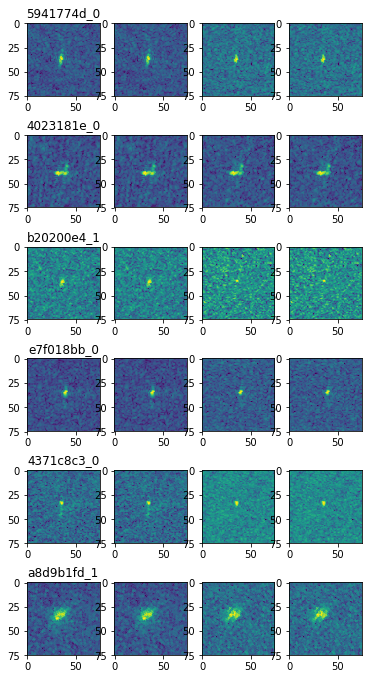

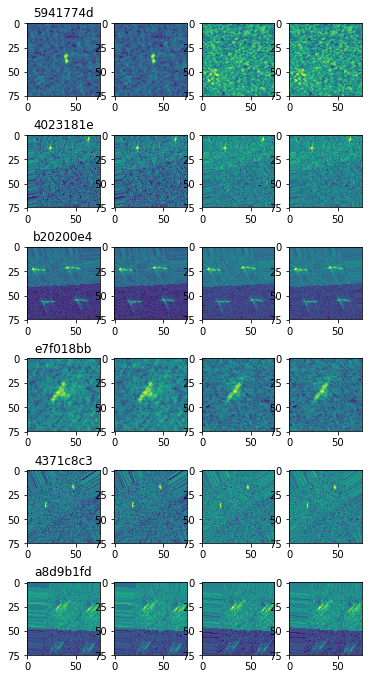

In [8]:
show_data_images(6, 3, id_test, y_data, band1_data, band1_data_gray, band2_data, band2_data_gray)
show_data_images(6, 3, id_test, None, band1_test, band1_test_gray, band2_test, band2_test_gray)

In [9]:
t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

time cost: 39.11 s
Done!


In [10]:
print(run_name)

SC_Iceberg_Classifier-Image_Proccess_Gray-20180112_221832
